# K-Means Clustering on User Behavior

11.6 接下来的工作

- spider: 用min maxin normalize each metrice
- bar

加入user profile后
- 每个count 转换为 ratio
- 用整个dataset的ratio整体做baseline参考

- credit_bucket: 用mean代替，转化为continuous；用lineplot 而不是 barplot


In [51]:
from sklearn.cluster import KMeans
import numpy as np

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from scipy import stats
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
%matplotlib inline

In [52]:
userengagement_df = pd.read_csv("user_engagement.csv")
userengagement_df['session_start_timestamp'] = pd.to_datetime(userengagement_df['session_start_timestamp'])
#first_session['user_signup_timestamp'] = pd.to_datetime(first_session['user_signup_timestamp'])
#first_session['action_timestamp'] = pd.to_datetime(first_session['action_timestamp'])

In [53]:
# groupby id, apply agg func
engage_df = userengagement_df.groupby('user_id', as_index=False).aggregate({'session_id': 'count',
                                                                            'session_length': 'mean',
                                                                            'logged_in_count': 'mean',
                                                                            'view_count': 'mean',
                                                                            'click_count': 'mean',
                                                                            })
# rename columns                                                                        
engage_df.columns = ['user_id', 'session_count', 'avg_session_length', 'avg_logged_in_count', 'avg_views_count', 'avg_clicks_count']

In [54]:
userengagement_df.shape

(1176858, 42)

In [55]:
engage_df.head()

,user_id,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
0,0000485dbdc19e76bedcaf155b4de9491f414a27,1,704.00000,2.00000,4.00000,0.00000
1,00008fb52ca81c6767db31f58ea37e7229c372e1,1,751.00000,0.00000,16.00000,6.00000
2,000091252c68230bd55a9abda98896c8610994bc,6,361.66667,0.83333,9.00000,12.16667
3,000091d428154729cbf338d4f51aa95af254d342,2,965.00000,1.00000,8.00000,6.50000
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,5,100.60000,0.80000,4.40000,4.80000


In [56]:
engage_df.describe()

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,285141.00000,285141.00000,285141.00000,285141.00000,285141.00000
mean,4.12728,375.37432,0.92981,5.38466,7.19840
std,7.09220,1756.40053,0.45096,4.27515,8.98738
min,1.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,160.20000,0.68182,3.00000,1.33333
50%,2.00000,273.00000,1.00000,4.00000,4.78571
75%,4.00000,452.00000,1.00000,6.66667,9.87500
max,323.00000,784816.00000,26.00000,164.00000,290.00000


In [57]:
# identify fake account
engage_df.loc[engage_df['session_count'] >= 90, :].shape

(151, 6)

In [58]:
# uer with 323 sessions in 30 days -- 11 sessions per day
userengagement_df.loc[userengagement_df['user_id']=='124b2b7812e5cc9142a0f15a3a80bef2855738cc', :].sort_values(by=['session_start_timestamp'])

,Unnamed: 0,session_id,user_id,session_length,view_count,view_aoop_overview_count,view_my_credit_count,view_credit_monitoring_count,view_my_recommendations_count,view_my_borrowing_power_count,...,click_count_auto_products.1,logged_in_count,session_start_timestamp,city,state,browser_name,browser_version,app_version,login_platform,os_name
343112,343112,741d08335ecc59b277eb4a6b845370f3f0d12a51,124b2b7812e5cc9142a0f15a3a80bef2855738cc,757,8,1,1,0,1,0,...,0,1,2018-07-10 13:09:23,West New York,NJ,Chrome Mobile,67.00000,NaN,Mobile Web,Android
239466,239466,f7fffba74d96457833e2f39a2e8ac7b6db7ad148,124b2b7812e5cc9142a0f15a3a80bef2855738cc,104,4,1,1,0,1,0,...,0,0,2018-07-11 02:49:39,Elizabeth,NJ,Chrome Mobile,67.00000,NaN,Mobile Web,Android
341573,341573,515c5115d782ae9998c84908652b96df90edbf9a,124b2b7812e5cc9142a0f15a3a80bef2855738cc,160,8,1,0,0,1,0,...,0,1,2018-07-11 11:26:17,Passaic,NJ,NaN,nan,App_Version2,Mobile App,Android
272460,272460,7cf44cdba463120d30b1fe10c61ae42870024b21,124b2b7812e5cc9142a0f15a3a80bef2855738cc,25,2,1,0,0,0,0,...,0,1,2018-07-11 13:52:45,Passaic,NJ,NaN,nan,App_Version2,Mobile App,Android
259597,259597,b6cfdefe3225171fcc27c78a8eb6ec09c3b4e119,124b2b7812e5cc9142a0f15a3a80bef2855738cc,20,3,2,0,0,1,0,...,0,1,2018-07-11 15:02:36,Jersey City,NJ,NaN,nan,App_Version2,Mobile App,Android
301064,301064,3ae830bc802db10f68e6829479a3fec05466b312,124b2b7812e5cc9142a0f15a3a80bef2855738cc,470,26,7,0,0,3,0,...,0,1,2018-07-11 17:08:59,Jersey City,NJ,NaN,nan,App_Version2,Mobile App,Android
288888,288888,ae4445d7fa7a61a590c488b7c168551c98e2cf4d,124b2b7812e5cc9142a0f15a3a80bef2855738cc,704,21,1,0,0,0,0,...,0,1,2018-07-11 20:52:10,West New York,NJ,NaN,nan,App_Version2,Mobile App,Android
254671,254671,d0bf68d3c41196f566cc6e7928ac3be55f768c96,124b2b7812e5cc9142a0f15a3a80bef2855738cc,564,27,6,0,0,3,0,...,0,1,2018-07-11 21:04:39,Elizabeth,NJ,NaN,nan,App_Version2,Mobile App,Android
321387,321387,059e17534fdcb219a09bcee08f62b036662a9e75,124b2b7812e5cc9142a0f15a3a80bef2855738cc,138,6,2,0,0,1,0,...,0,1,2018-07-12 00:23:03,Elizabeth,NJ,NaN,nan,App_Version2,Mobile App,Android
240407,240407,79e8c106a2494ed81c9d04837aa126ea80d88d11,124b2b7812e5cc9142a0f15a3a80bef2855738cc,607,5,1,0,0,2,0,...,0,1,2018-07-12 11:33:48,Irvington,NJ,NaN,nan,App_Version2,Mobile App,Android


In [59]:
# drop user with avg session length >= 15,000s --- that's 5.5h
engage_df.loc[(engage_df['avg_session_length'] >= 20000), :].shape

(58, 6)

In [60]:
# final data for clustering
engage_df = engage_df.loc[(engage_df['session_count'] < 90) & (engage_df['avg_session_length'] < 20000), :]

In [61]:
engage_df.describe()

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,284932.00000,284932.00000,284932.00000,284932.00000,284932.00000
mean,4.06049,362.85173,0.92970,5.38566,7.20024
std,6.39583,394.40387,0.45107,4.27560,8.98996
min,1.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,160.33333,0.67718,3.00000,1.33333
50%,2.00000,273.00000,1.00000,4.00000,4.79118
75%,4.00000,452.00000,1.00000,6.66667,9.89474
max,89.00000,19874.59091,26.00000,164.00000,290.00000


/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


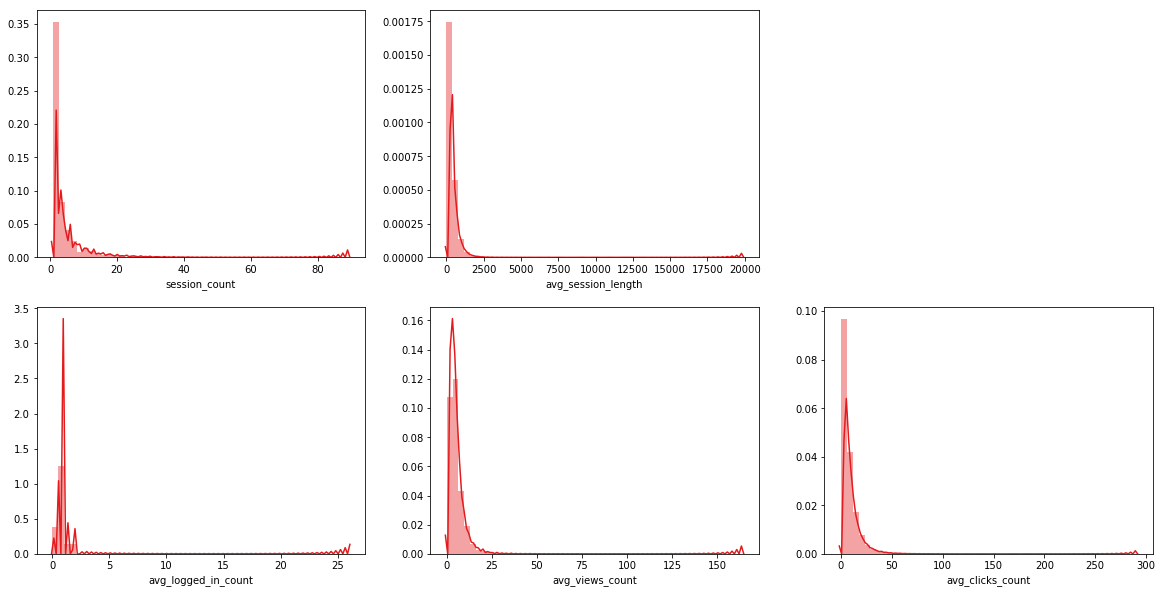

In [62]:
# plot distributions
fig, ax = plt.subplots(2, 3, figsize=(20,10))
#plt.subplot(2, 3, i)
sns.distplot(engage_df['session_count'], ax=ax[0, 0])
sns.distplot(engage_df['avg_session_length'], ax=ax[0, 1])
sns.distplot(engage_df['avg_logged_in_count'], ax=ax[1, 0])
sns.distplot(engage_df['avg_views_count'], ax=ax[1, 1])
sns.distplot(engage_df['avg_clicks_count'], ax=ax[1, 2])
fig.delaxes(ax[0, 2])

# trends are basically the same -- poisson dist
# why multiple logins in one session?

## 1 Clustering

In [63]:
# exclude user_id from input
engage_df2 = engage_df.iloc[:, 1:].copy()
# standardization
scl = StandardScaler().fit(engage_df2)
engage_df2[:] = scl.transform(engage_df2[:])
engage_df2.describe()

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
count,284932.00000,284932.00000,284932.00000,284932.00000,284932.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000
min,-0.47851,-0.92000,-2.06111,-1.25963,-0.80092
25%,-0.47851,-0.51348,-0.55982,-0.55797,-0.65261
50%,-0.32216,-0.22782,0.15586,-0.32409,-0.26797
75%,-0.00946,0.22603,0.15586,0.29961,0.29972
max,13.28048,49.47156,55.58004,37.09767,31.45735


In [64]:
engage_df2.head()

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count
0,-0.47851,0.86497,2.37283,-0.32409,-0.80092
1,-0.47851,0.98414,-2.06111,2.48254,-0.13351
2,0.30325,-0.00300,-0.21364,0.84534,0.55244
3,-0.32216,1.52673,0.15586,0.61146,-0.07789
4,0.14689,-0.66493,-0.28753,-0.23053,-0.26699


In [100]:
#Cluster the data
kmeans = KMeans(n_clusters=7, random_state=10).fit(engage_df2) 
labels = kmeans.labels_

#Glue back to originaal data
engage_df2['cluster'] = labels
engage_df2.head()

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,cluster
0,-0.47851,0.86497,2.37283,-0.32409,-0.80092,3
1,-0.47851,0.98414,-2.06111,2.48254,-0.13351,5
2,0.30325,-0.00300,-0.21364,0.84534,0.55244,5
3,-0.32216,1.52673,0.15586,0.61146,-0.07789,5
4,0.14689,-0.66493,-0.28753,-0.23053,-0.26699,2


In [104]:
# Aggregate by cluster
engage_df2_cluster = engage_df2.groupby(['cluster']).aggregate({'session_count': 'mean',
                                                                'avg_session_length': 'mean',
                                                                'avg_logged_in_count': 'mean',
                                                                'avg_views_count': 'mean',
                                                                'avg_clicks_count': 'mean',
                                                                'cluster': 'count'
                                                                })

In [107]:
# rename count
engage_df2_cluster.rename(columns={'cluster':'counts'}, inplace=True)
#engage_df2_cluster.reset_index(inplace=True)
engage_df2_cluster

,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,counts
cluster,,,,,,
0,0.01147,-0.47540,-1.26760,-0.58087,-0.49807,60974
1,-0.40881,1.54720,1.27240,3.53752,3.56727,8753
2,-0.22756,-0.12151,0.13563,-0.34448,-0.34689,128046
3,-0.39264,0.13409,2.30026,0.57257,0.07245,19162
4,1.46800,27.20714,0.30499,0.46873,0.12549,109
5,-0.23968,0.65146,0.13453,0.81138,0.86561,51788
6,3.21701,-0.51365,-0.14231,-0.27823,-0.16573,16100


### Exclude outlier cluster
non-sense session length, only 109 observations

In [109]:
outlier_cluster_idx = engage_df2_cluster.loc[engage_df2_cluster['counts'] < 1000,:].index[0]
outlier_cluster_idx

4

In [117]:
# drop outlier cluster
df = engage_df2_cluster.drop(outlier_cluster_idx).reset_index()
# reorder cluster index
df

,cluster,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,counts
0,0,0.01147,-0.47540,-1.26760,-0.58087,-0.49807,60974
1,1,-0.40881,1.54720,1.27240,3.53752,3.56727,8753
2,2,-0.22756,-0.12151,0.13563,-0.34448,-0.34689,128046
3,3,-0.39264,0.13409,2.30026,0.57257,0.07245,19162
4,5,-0.23968,0.65146,0.13453,0.81138,0.86561,51788
5,6,3.21701,-0.51365,-0.14231,-0.27823,-0.16573,16100


### Spider Plot

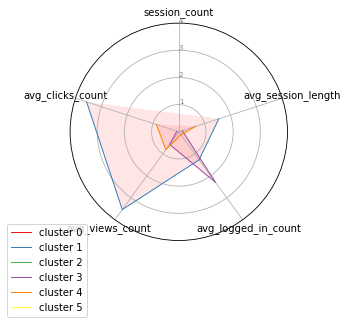

In [112]:
df_spider = df.iloc[:,1:-1] # exclude counts
# ------- PART 1: Create background

# number of variable
categories=list(df_spider)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4], ["1","2","3","4"], color="grey", size=7)
plt.ylim(0,4)

 
# ------- PART 2: Add plots
for i in range(len(df_spider)):
    values=df_spider.loc[i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster "+str(i))
    ax.fill(angles, values, 'r', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('radar.png')

### Bar Plot

In [113]:
df_barplot = pd.melt(df.iloc[:,:-1], id_vars="cluster", var_name="metrice", value_name="value")

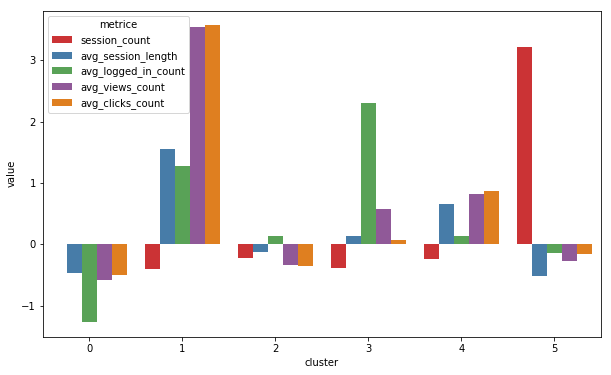

In [114]:
sns.set_palette('Set1')
plt.subplots(figsize=(10,6))
sns.barplot(x="cluster", y="value", hue="metrice", data=df_barplot)
plt.savefig('bar.png')

## 2 User Profile for each Cluster

In [115]:
# user and their corresponding clusters
engage_df['cluster'] = labels
engage_df.head()

,user_id,session_count,avg_session_length,avg_logged_in_count,avg_views_count,avg_clicks_count,cluster
0,0000485dbdc19e76bedcaf155b4de9491f414a27,1,704.00000,2.00000,4.00000,0.00000,3
1,00008fb52ca81c6767db31f58ea37e7229c372e1,1,751.00000,0.00000,16.00000,6.00000,5
2,000091252c68230bd55a9abda98896c8610994bc,6,361.66667,0.83333,9.00000,12.16667,5
3,000091d428154729cbf338d4f51aa95af254d342,2,965.00000,1.00000,8.00000,6.50000,5
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,5,100.60000,0.80000,4.40000,4.80000,2


In [84]:
# import user profile data
userprofile_df = pd.read_csv("user_profile.csv")

/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
# join user profile and user_cluster(exclude outlier cluster)
result_col = ['user_id', 'gender', 'state', 'is_homeowner', 'credit_score_bucket', 'count_tradelines_open_collection_accounts', 'cluster']
result_df = pd.merge(engage_df.loc[engage_df['cluster'] != outlier_cluster_idx,:], userprofile_df, how='inner', on=['user_id'])[result_col]

# outlier excluded
result_df

,user_id,gender,state,is_homeowner,credit_score_bucket,count_tradelines_open_collection_accounts,cluster
0,0000485dbdc19e76bedcaf155b4de9491f414a27,Female,TX,False,"(520.0, 525.0]",5,3
1,00008fb52ca81c6767db31f58ea37e7229c372e1,Female,AZ,False,"(525.0, 530.0]",5,5
2,000091252c68230bd55a9abda98896c8610994bc,Male,CA,False,"(525.0, 530.0]",5,5
3,000091d428154729cbf338d4f51aa95af254d342,Unisex,CA,False,"(625.0, 630.0]",0,5
4,0000b28d30dd9cf2424e83822b2877fec98b7de5,Female,GA,True,"(595.0, 600.0]",1,2
5,0000b68d91d518befd9d44c3217fd69f4e2fa66c,NaN,NJ,False,"(625.0, 630.0]",2,2
6,0000ebedec77fecfff9ba35b0acfbbb79bf35c9a,Female,OK,True,"(525.0, 530.0]",2,0
7,00010dae93e32f0b3da57378424885bb2de53711,NaN,WI,False,"(655.0, 660.0]",0,2
8,000120239e250b154ad041279d5234e5d8da01ab,Female,NC,True,"(635.0, 640.0]",6,0
9,00017b0c10f321b7b62775ef06422b53cd71fa7a,Female,OK,False,"(700.0, 705.0]",0,2


## Gender

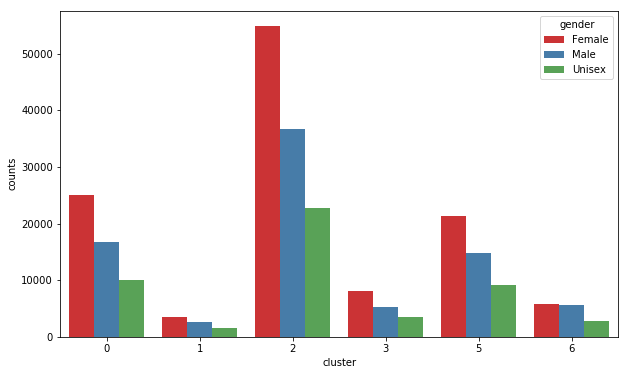

In [118]:
# Gender
plt.subplots(figsize=(10,6))
gender_grouped = result_df.groupby(['cluster', 'gender']).size().reset_index()
gender_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="gender", data=gender_grouped)

## State

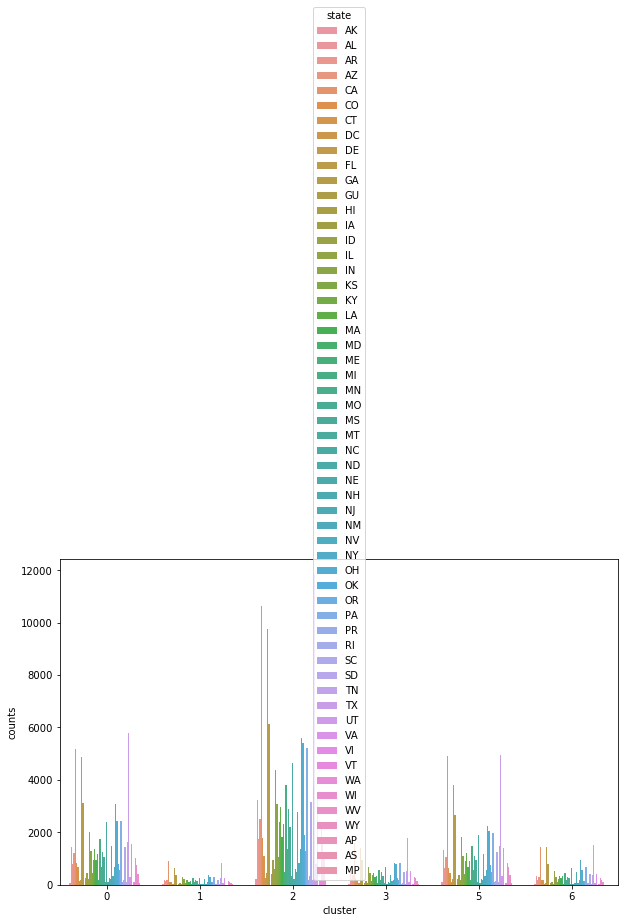

In [119]:
# State
plt.subplots(figsize=(10,6))
state_grouped = result_df.groupby(['cluster', 'state']).size().reset_index()
state_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue='state', data=state_grouped)

## Home Ownership

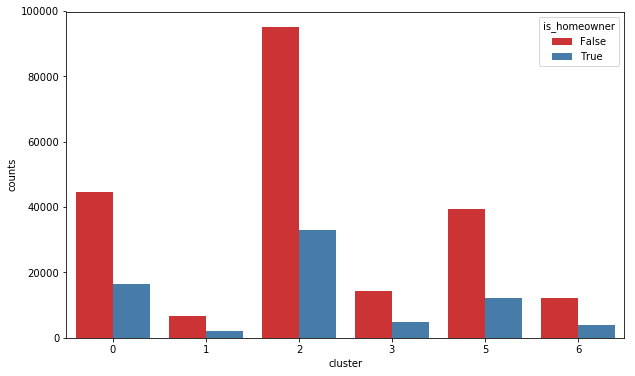

In [120]:
plt.subplots(figsize=(10,6))
ho_grouped = result_df.groupby(['cluster', 'is_homeowner']).size().reset_index()
ho_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="is_homeowner", data=ho_grouped)

## Credit Score 

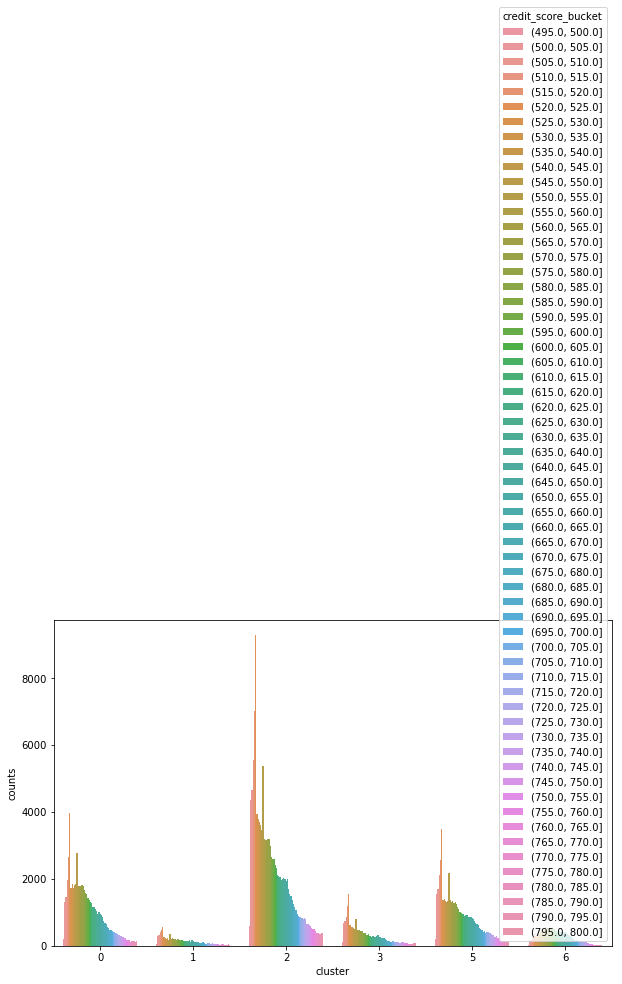

In [121]:
plt.subplots(figsize=(10,6))
credit_grouped = result_df.groupby(['cluster', 'credit_score_bucket']).size().reset_index()
credit_grouped.rename(columns={0:'counts'}, inplace=True)
sns.barplot(x="cluster", y="counts", hue="credit_score_bucket", data=credit_grouped)

## Collection Account

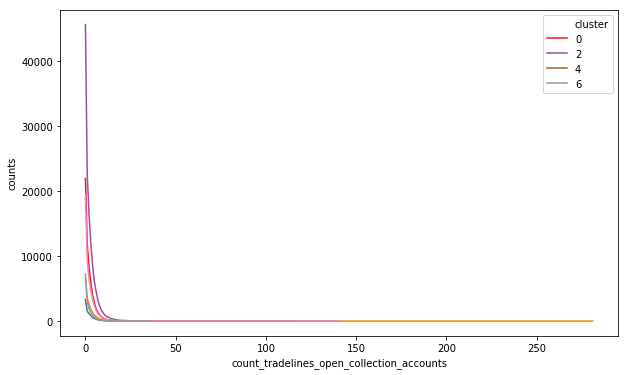

In [122]:
plt.subplots(figsize=(10,6))
clct_grouped = result_df.groupby(['cluster', 'count_tradelines_open_collection_accounts']).size().reset_index()
clct_grouped.rename(columns={0:'counts'}, inplace=True)
sns.lineplot(x="count_tradelines_open_collection_accounts", y="counts", hue="cluster", palette="Set1",data=clct_grouped)